In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [21]:
dataset=pd.read_csv("Data.csv")

In [22]:
dataset['Amount']=dataset['Amount'].str.replace('$',"")
dataset

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,54.00
1,MyStore,1,3,2,1,10,Cash,7,-17.80
2,MyStore,1,3,2,1,10,Card,7,41.99
3,MyStore,1,3,2,1,11,Card,20,412.50
4,MyStore,1,3,2,1,12,Cash,1,-18.00
5,MyStore,1,3,2,1,12,Card,1,-5.00
6,MyStore,1,3,2,1,12,Card,15,118.50
7,MyStore,1,3,2,1,13,Cash,90,-94.92
8,MyStore,1,3,2,1,13,Card,28,423.50
9,MyStore,1,3,2,1,14,Cash,34,-95.39


In [23]:
dataset["BranchName"].value_counts()

MyStore    4100
Name: BranchName, dtype: int64

In [24]:
dataset.drop("BranchName",axis=1,inplace=True)



In [25]:
dataset.shape

(4100, 8)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 8 columns):
Week                4100 non-null int64
DayWeek             4100 non-null int64
Day                 4100 non-null int64
Month               4100 non-null int64
Hour                4100 non-null int64
Transaction_Type    4100 non-null object
Units               4100 non-null int64
Amount              4100 non-null object
dtypes: int64(6), object(2)
memory usage: 256.3+ KB


In [33]:
pd.to_numeric(dataset["Amount"])

ValueError: Unable to parse string "-1,041.80" at position 966

In [36]:
dataset["Amount"]=dataset["Amount"].str.replace(",","")

In [38]:
dataset["Amount"]=pd.to_numeric(dataset["Amount"])

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 8 columns):
Week                4100 non-null int64
DayWeek             4100 non-null int64
Day                 4100 non-null int64
Month               4100 non-null int64
Hour                4100 non-null int64
Transaction_Type    4100 non-null object
Units               4100 non-null int64
Amount              4100 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 256.3+ KB


In [40]:
dataset.describe()

,Week,DayWeek,Day,Month,Hour,Units,Amount
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,34.017805,4.183902,15.812195,8.231463,12.949024,12.779512,35.237046
std,14.714289,1.967864,8.810817,3.396586,2.631853,17.854968,183.538724
min,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,-1041.800000
25%,29.000000,3.000000,8.000000,7.000000,11.000000,3.000000,-47.000000
50%,37.000000,4.000000,16.000000,9.000000,13.000000,8.000000,-2.385000
75%,45.000000,6.000000,23.000000,11.000000,15.000000,16.000000,99.512500
max,53.000000,7.000000,31.000000,12.000000,19.000000,274.000000,1487.000000


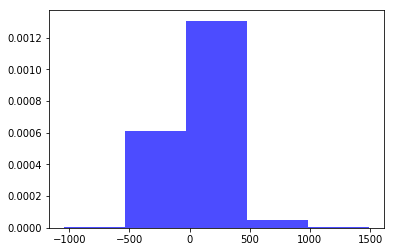

In [60]:
num_bins = 5
plt.hist(dataset['Amount'], num_bins, facecolor='blue',alpha=0.7,density=1)
plt.show()

Text(0, 0.5, 'Sales')

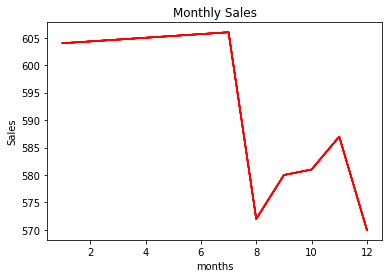

In [78]:
sales_by_month=dataset.groupby(by="Month").count()
plt.plot(sales_by_month,color="red")
plt.title("Monthly Sales")
plt.xlabel("months")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

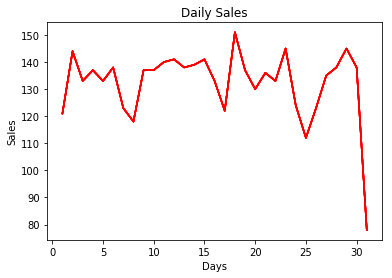

In [82]:
sales_by_day=dataset.groupby(by="Day").count()
plt.plot(sales_by_day,color="red")
plt.title("Daily Sales")
plt.xlabel("Days")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

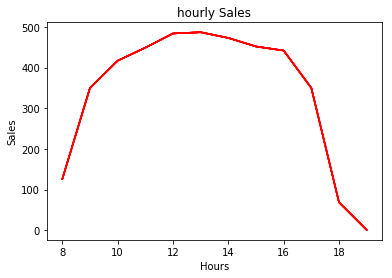

In [83]:
sales_by_day=dataset.groupby(by="Hour").count()
plt.plot(sales_by_day,color="red")
plt.title("hourly Sales")
plt.xlabel("Hours")
plt.ylabel("Sales")